# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from utils import load_log

path = '../../shared_data/round4/'
days = [1, 2, 3]

activity = [pd.read_csv(path + f'prices_round_4_day_{d}.csv', sep=';') for d in days]
activity = pd.concat(activity)
activity.set_index(['product', 'day', 'timestamp'], inplace=True)

trade = pd.concat([pd.read_csv(path + f'trades_round_4_day_{d}_nn.csv', sep=';').assign(day=d) for d in days])
trade.set_index(['symbol', 'day', 'timestamp'], inplace=True)

products = activity.index.get_level_values(0).unique()
products

Index(['COCONUT', 'COCONUT_COUPON'], dtype='object', name='product')

In [2]:
(activity.loc['COCONUT']['ask_price_1'] - activity.loc['COCONUT']['bid_price_1']).describe()

count    30000.000000
mean         1.472633
std          0.499259
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
dtype: float64

In [3]:
(activity.loc['COCONUT_COUPON']['ask_price_1'] - activity.loc['COCONUT_COUPON']['bid_price_1']).describe()

count    29998.000000
mean         1.089006
std          0.284757
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
dtype: float64

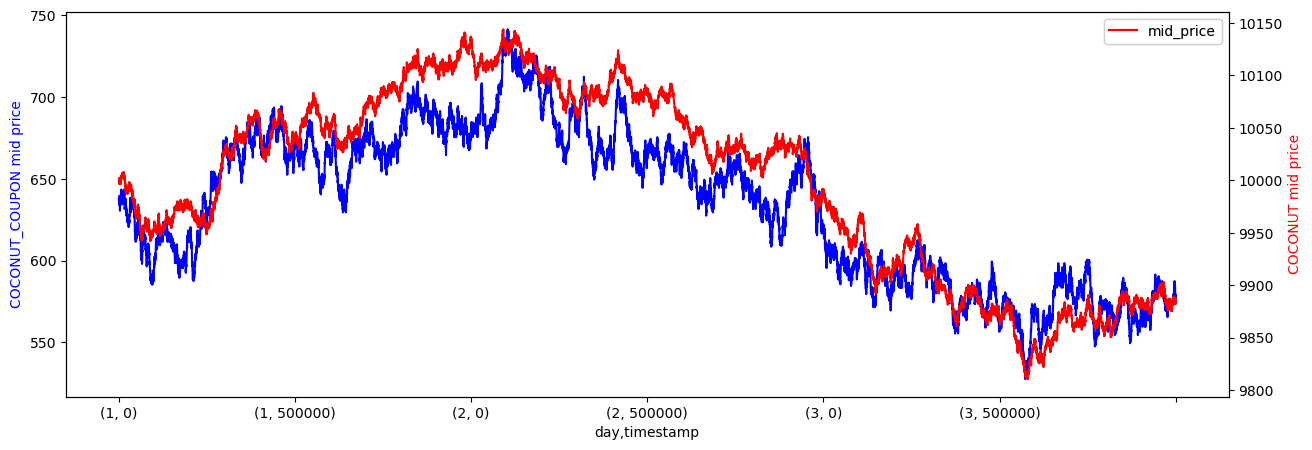

In [4]:
fig, ax = plt.subplots(figsize=(15, 5))
ax2 = ax.twinx()

activity.loc['COCONUT_COUPON'].plot(ax=ax, y=['mid_price'], figsize=(15, 5), color='blue')
ax.set_ylabel('COCONUT_COUPON mid price', color='blue')
activity.loc['COCONUT'].plot(ax=ax2, y=['mid_price'], color='red')
ax2.set_ylabel('COCONUT mid price', color='red')
plt.show()

C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coconut = activity.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coupons = activity.loc['COCONUT_COUPON', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coconut = trade.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coupons = trade.loc['COCONUT_COUPON', d]


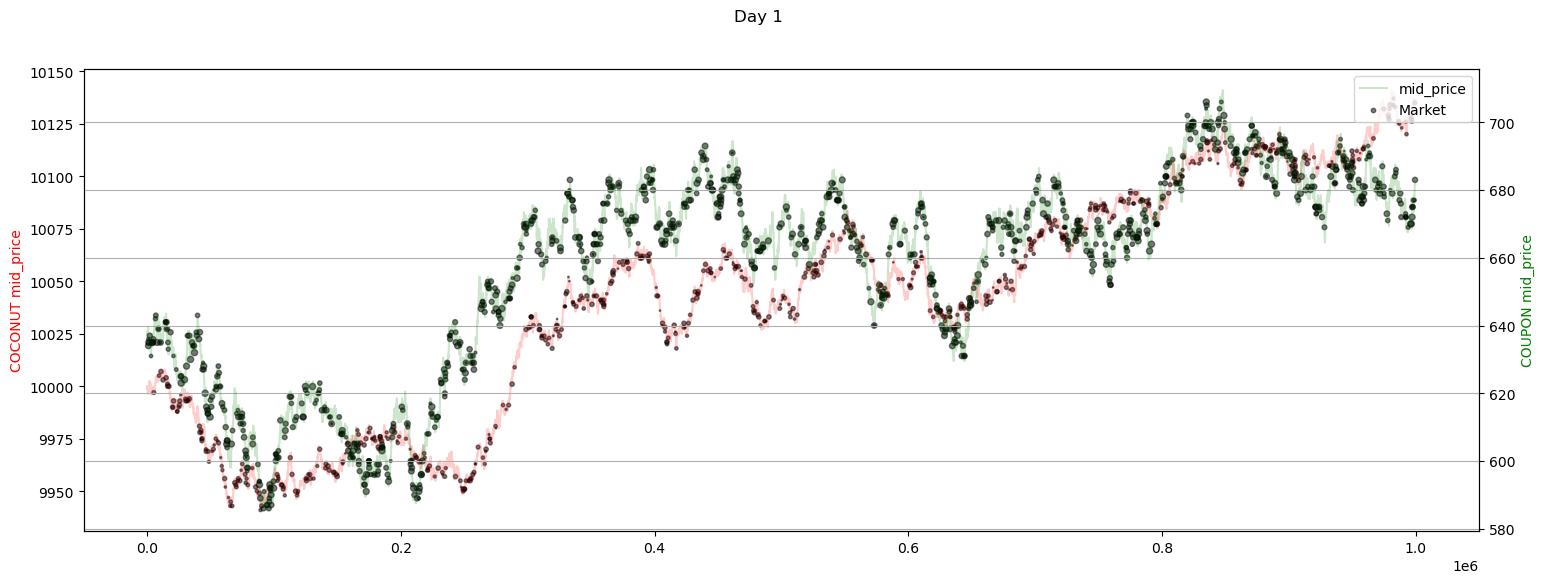

C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coconut = activity.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coupons = activity.loc['COCONUT_COUPON', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coconut = trade.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coupons = trade.loc['COCONUT_COUPON', d]


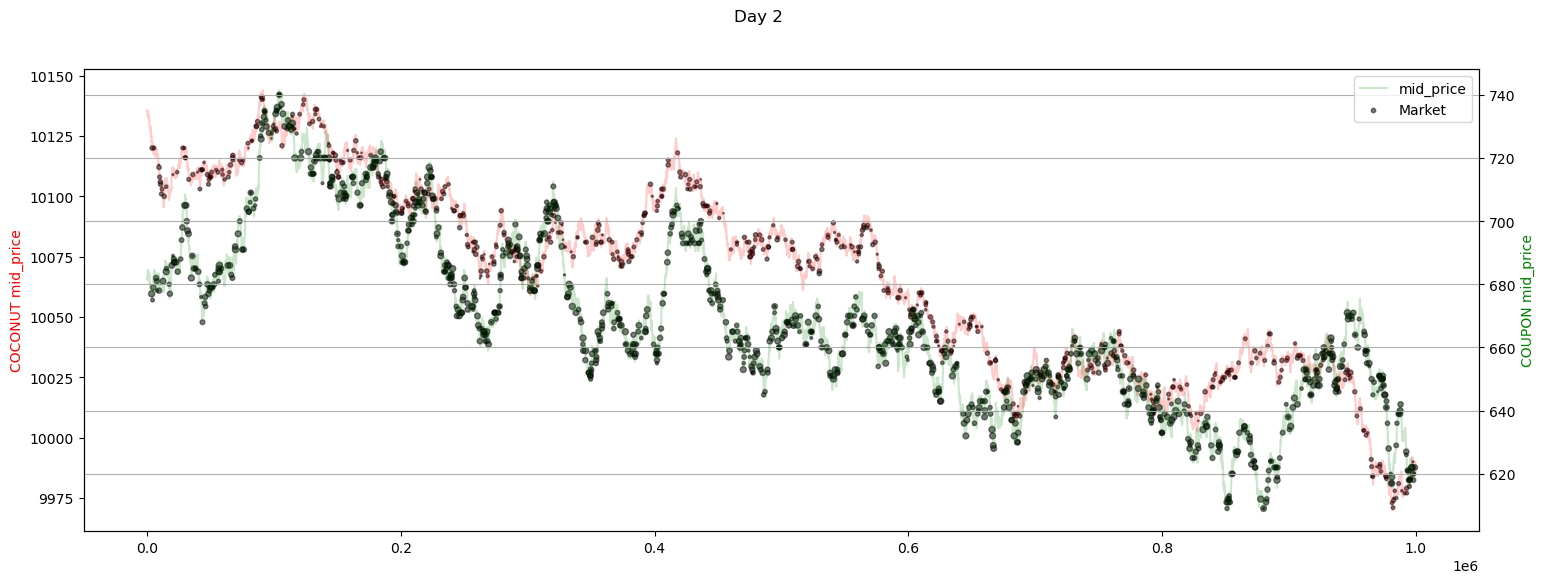

C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coconut = activity.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coupons = activity.loc['COCONUT_COUPON', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coconut = trade.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\2812889719.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coupons = trade.loc['COCONUT_COUPON', d]


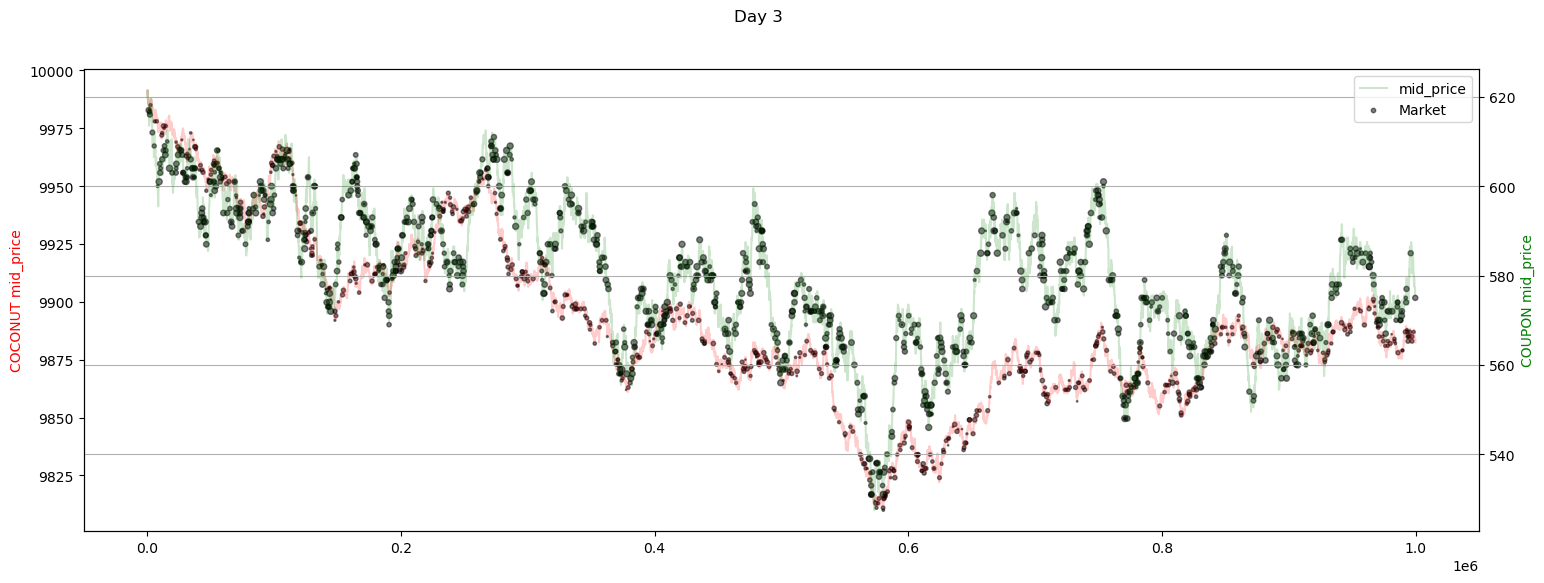

In [5]:
window_size = 20

for d in days:
    activity_coconut = activity.loc['COCONUT', d]
    activity_coupons = activity.loc['COCONUT_COUPON', d]
    market_coconut = trade.loc['COCONUT', d]
    market_coupons = trade.loc['COCONUT_COUPON', d]

    fig, ax1 = plt.subplots(figsize=(18, 6))
    fig.suptitle(f'Day {d}')

    ax2 = ax1.twinx()
    assert isinstance(ax1, plt.Axes)
    assert isinstance(ax2, plt.Axes)
    ax1.plot(activity_coconut['mid_price'], label='mid_price', color='red', alpha=0.2,)
    ax1.scatter(market_coconut.index, market_coconut.price, label='Market', s=1*market_coconut.quantity, color='black', alpha=0.5)
    ax1.set_ylabel('COCONUT mid_price', color='red')
    ax2.plot(activity_coupons['mid_price'], label='mid_price', color='green', alpha=0.2,)
    ax2.scatter(market_coupons.index, market_coupons.price, label='Market', s=1*market_coupons.quantity, color='black', alpha=0.5)
    ax2.set_ylabel('COUPON mid_price', color='green')
    plt.xlabel('Timestamp')
    plt.grid(axis='y')
    plt.legend()    
    plt.show()

In [6]:
data = pd.DataFrame([activity.loc['COCONUT']['mid_price'], activity.loc['COCONUT_COUPON']['mid_price']]).T
data.columns = ['COCONUT', 'COCONUT_COUPON']
data.corr()

,COCONUT,COCONUT_COUPON
COCONUT,1.000000,0.957869
COCONUT_COUPON,0.957869,1.000000


# COCONUT - 2 * COCONUT_COUPON

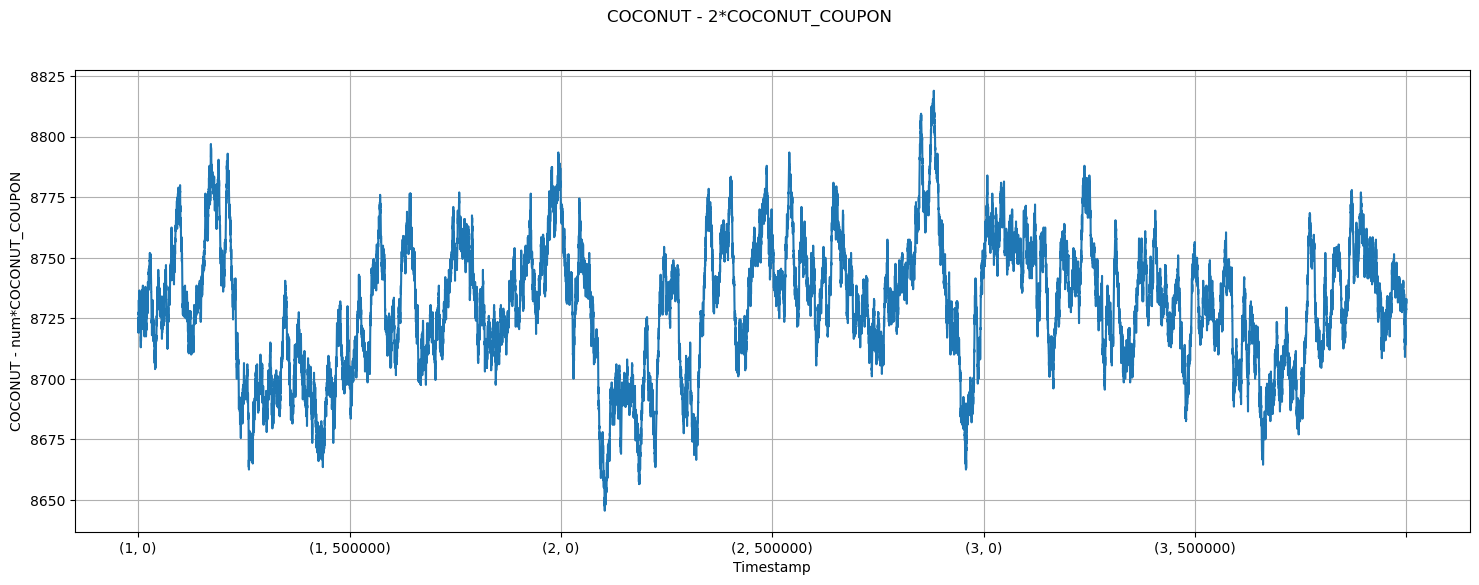

In [7]:
# num = data['COCONUT'].sum()/data['COCONUT_COUPON'].sum()
num = 2
diff = data['COCONUT'] - num*data['COCONUT_COUPON']

fig, ax = plt.subplots(figsize=(18, 6))
fig.suptitle(f'COCONUT - {num}*COCONUT_COUPON')
diff.plot(ax=ax)
plt.xlabel('Timestamp')
plt.ylabel('COCONUT - num*COCONUT_COUPON')
plt.grid()
plt.show()

In [8]:
diff.groupby(diff.index.get_level_values(0)).describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
1,10000.0,8726.67550,26.733396,8662.5,8707.5,8725.5,8746.0,8797.0
2,10000.0,8730.37915,30.300181,8645.5,8711.0,8734.5,8749.5,8819.0
3,10000.0,8732.36970,22.368924,8664.5,8716.5,8733.5,8750.0,8788.0


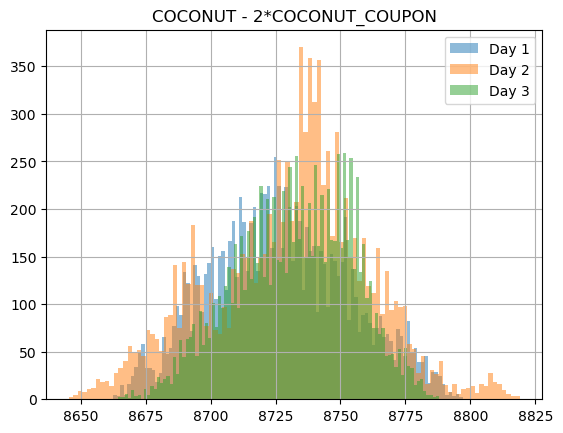

In [9]:
for d in days:
    diff.loc[d].hist(bins=100, alpha=0.5)
plt.legend([f'Day {d}' for d in days])
plt.title('COCONUT - 2*COCONUT_COUPON')
plt.show()

In [10]:
diff.groupby(diff.index.get_level_values(0)).describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
1,10000.0,8726.67550,26.733396,8662.5,8707.5,8725.5,8746.0,8797.0
2,10000.0,8730.37915,30.300181,8645.5,8711.0,8734.5,8749.5,8819.0
3,10000.0,8732.36970,22.368924,8664.5,8716.5,8733.5,8750.0,8788.0


In [11]:
from statsmodels.tsa.stattools import adfuller
adfuller(diff)

(-6.4396318550533005,
 1.6201962385061108e-08,
 4,
 29995,
 {'1%': -3.43056803166244,
  '5%': -2.861636364100729,
  '10%': -2.566821291670243},
 129937.2088468891)

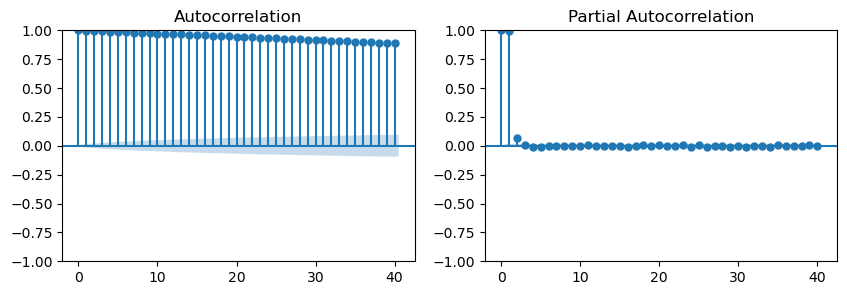

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
plot_acf(diff, lags=40, ax=ax[0])
plot_pacf(diff, lags=40, ax=ax[1])
plt.show()

In [13]:
n_list = [1., 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]

for n in n_list:
    diff = data['COCONUT'] - n*data['COCONUT_COUPON']
    print(f'num={n}, adf={adfuller(diff)[1]}')

num=1.0, adf=0.3539759169846492
num=1.1, adf=0.20049041076884055
num=1.2, adf=0.08490481326966104
num=1.3, adf=0.021674445993231567
num=1.4, adf=0.003648827027015627
num=1.5, adf=0.000356439697028601
num=1.6, adf=2.2482229064089422e-05
num=1.7, adf=1.282098750326743e-06
num=1.8, adf=1.1209880155879557e-07
num=1.9, adf=2.4545164544878708e-08
num=2.0, adf=1.6201962385061108e-08
num=2.1, adf=2.7222599976488827e-08
num=2.2, adf=8.234830326704421e-08
num=2.3, adf=3.2303392454578996e-07
num=2.4, adf=1.314188992969448e-06
num=2.5, adf=4.913835021519298e-06
num=2.6, adf=2.304419202764667e-05
num=2.7, adf=6.293500515524661e-05
num=2.8, adf=0.0001502156537101699
num=2.9, adf=0.000317989873350451


# Options pricing with BSM model

### Black-Scholes European call option pricing model
$$ C = SN(d_1) - Ke^{-rT}N(d_2) $$
where
$$ d_1 = \frac{1}{\sigma\sqrt{T}}\left[\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T\right] $$
$$ d_2 = d_1 - \sigma\sqrt{T} $$
and
$$ N(d) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{d}e^{-\frac{1}{2}x^2}dx $$
is the cumulative distribution function of the standard normal distribution.

In [14]:
for d in days:
    print(f'Day {d}: {np.log(activity.loc['COCONUT']['mid_price'][d, 999_900]/activity.loc['COCONUT']['mid_price'][d, 0])}')

Day 1: 0.01340968690991774
Day 2: -0.014459520017739778
Day 3: -0.010919171562178025


In [15]:
np.std([0.01340968690991774, -0.014459520017739778, -0.010919171562178025])

0.012387808148510187

In [16]:
from scipy.optimize import curve_fit
from scipy.stats import norm

for d in days:

    def func(x, a, b=251-d):
        d1 = 1/(a * np.sqrt(b)) * (np.log(x/10_000) + (0.5 * a**2) * b)
        d2 = d1 - a * np.sqrt(b)
        return x * norm.cdf(d1) - 10_000 * norm.cdf(d2)

    popt, pcov = curve_fit(func, activity.loc['COCONUT']['mid_price'][d], activity.loc['COCONUT_COUPON']['mid_price'][d], p0=[0.01])
    print(f'Day {d}: popt = {popt}, pcov = {pcov}')

Day 1: popt = [0.01007454], pcov = [[4.83227653e-12]]
Day 2: popt = [0.01004868], pcov = [[5.46849951e-12]]
Day 3: popt = [0.01012761], pcov = [[3.33516048e-12]]


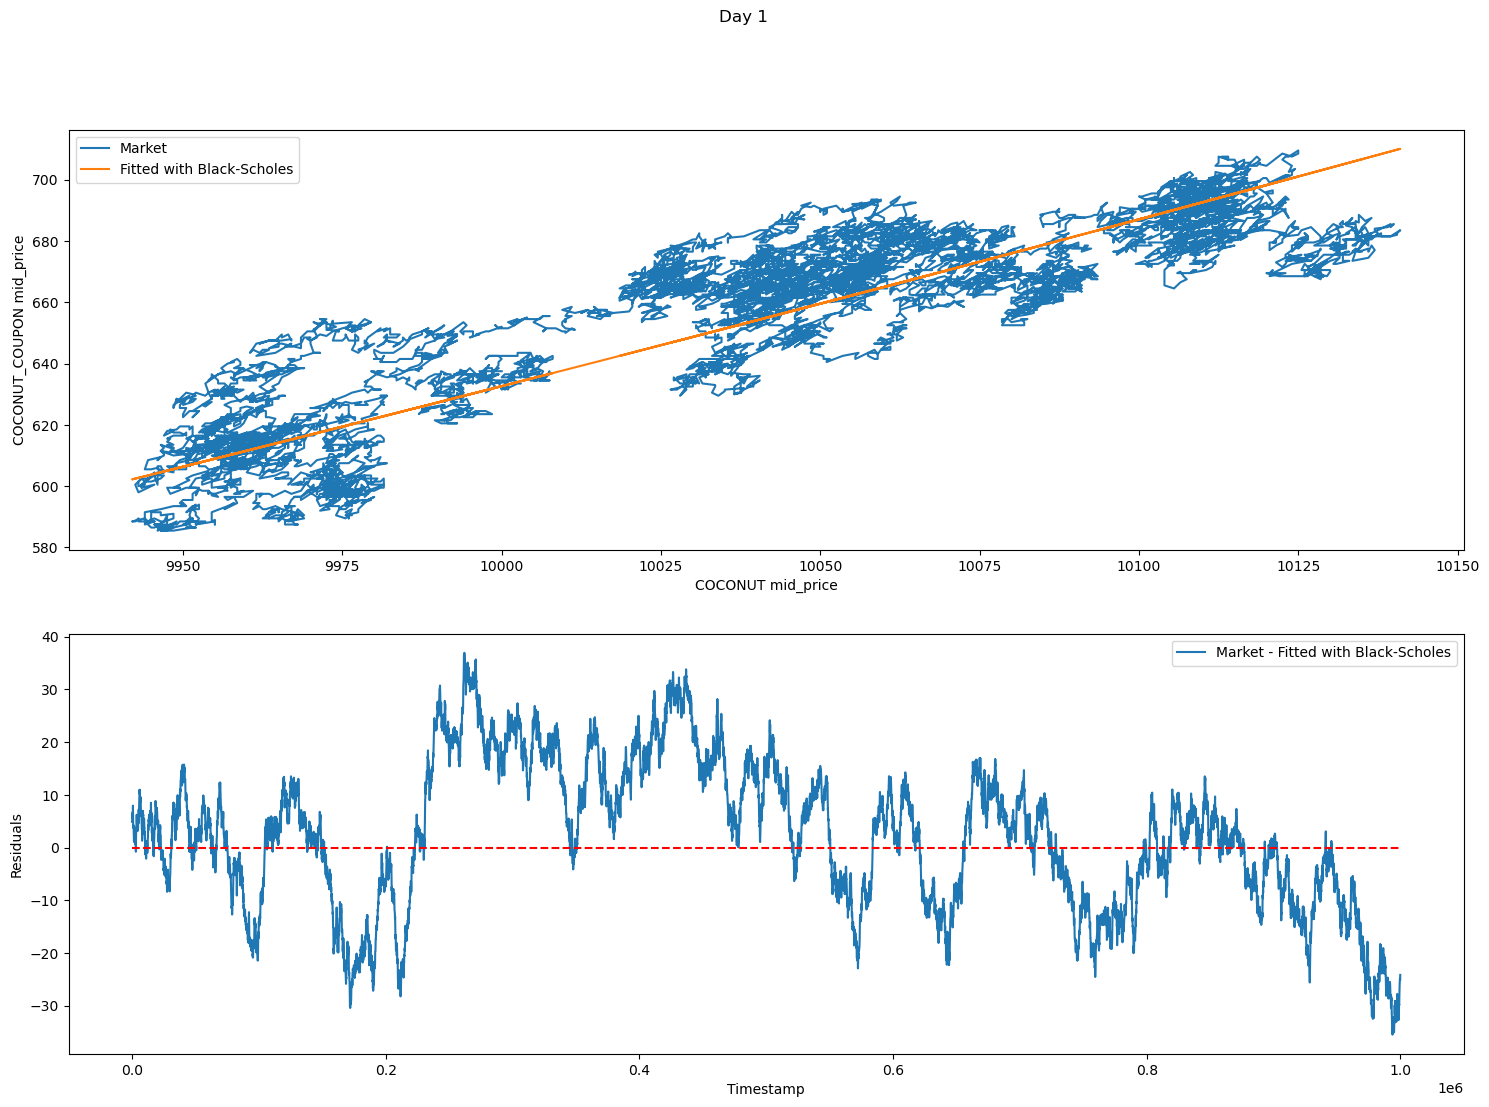

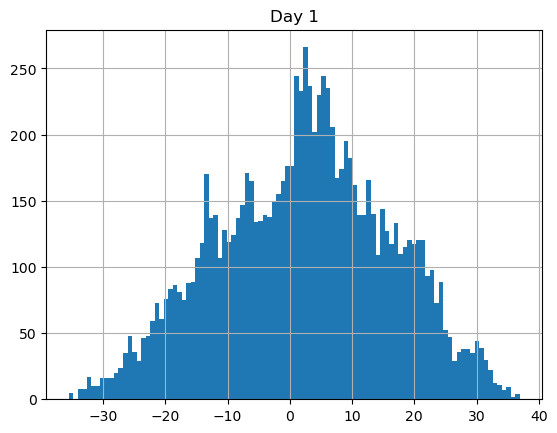

count    10000.000000
mean         2.202754
std         13.837691
min        -35.485356
25%         -7.706318
50%          2.732521
75%         11.994991
max         36.932894
Name: mid_price, dtype: float64
(-3.3018730816478916, 0.014794955019684483, 2, 9997, {'1%': -3.431004294278137, '5%': -2.861829159140512, '10%': -2.5669239142727114}, 29604.9721865888)


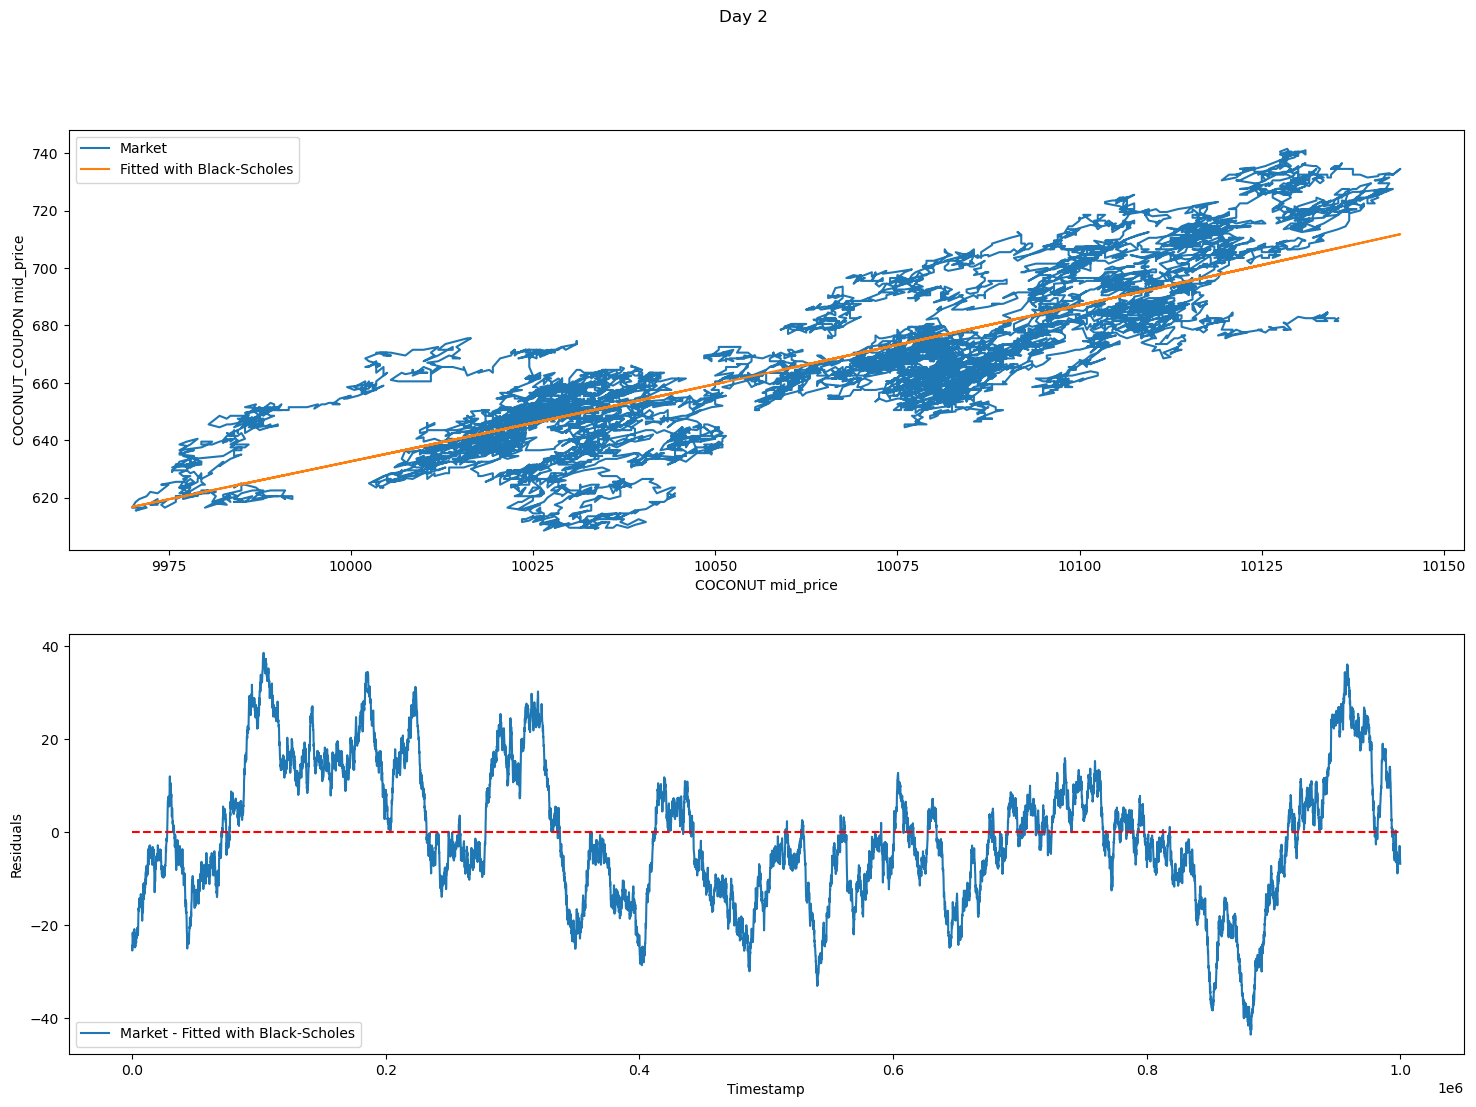

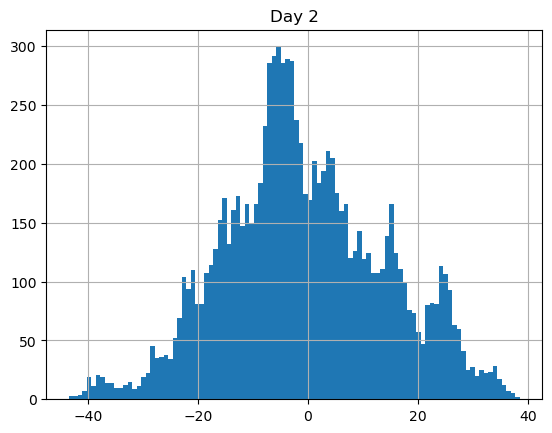

count    10000.000000
mean        -0.695861
std         14.706682
min        -43.499198
25%        -10.442569
50%         -2.262859
75%          9.153550
max         38.514644
Name: mid_price, dtype: float64
(-3.5204133884180293, 0.007478053285387664, 1, 9998, {'1%': -3.431004228818807, '5%': -2.8618291302145686, '10%': -2.566923898875394}, 29314.684395081644)


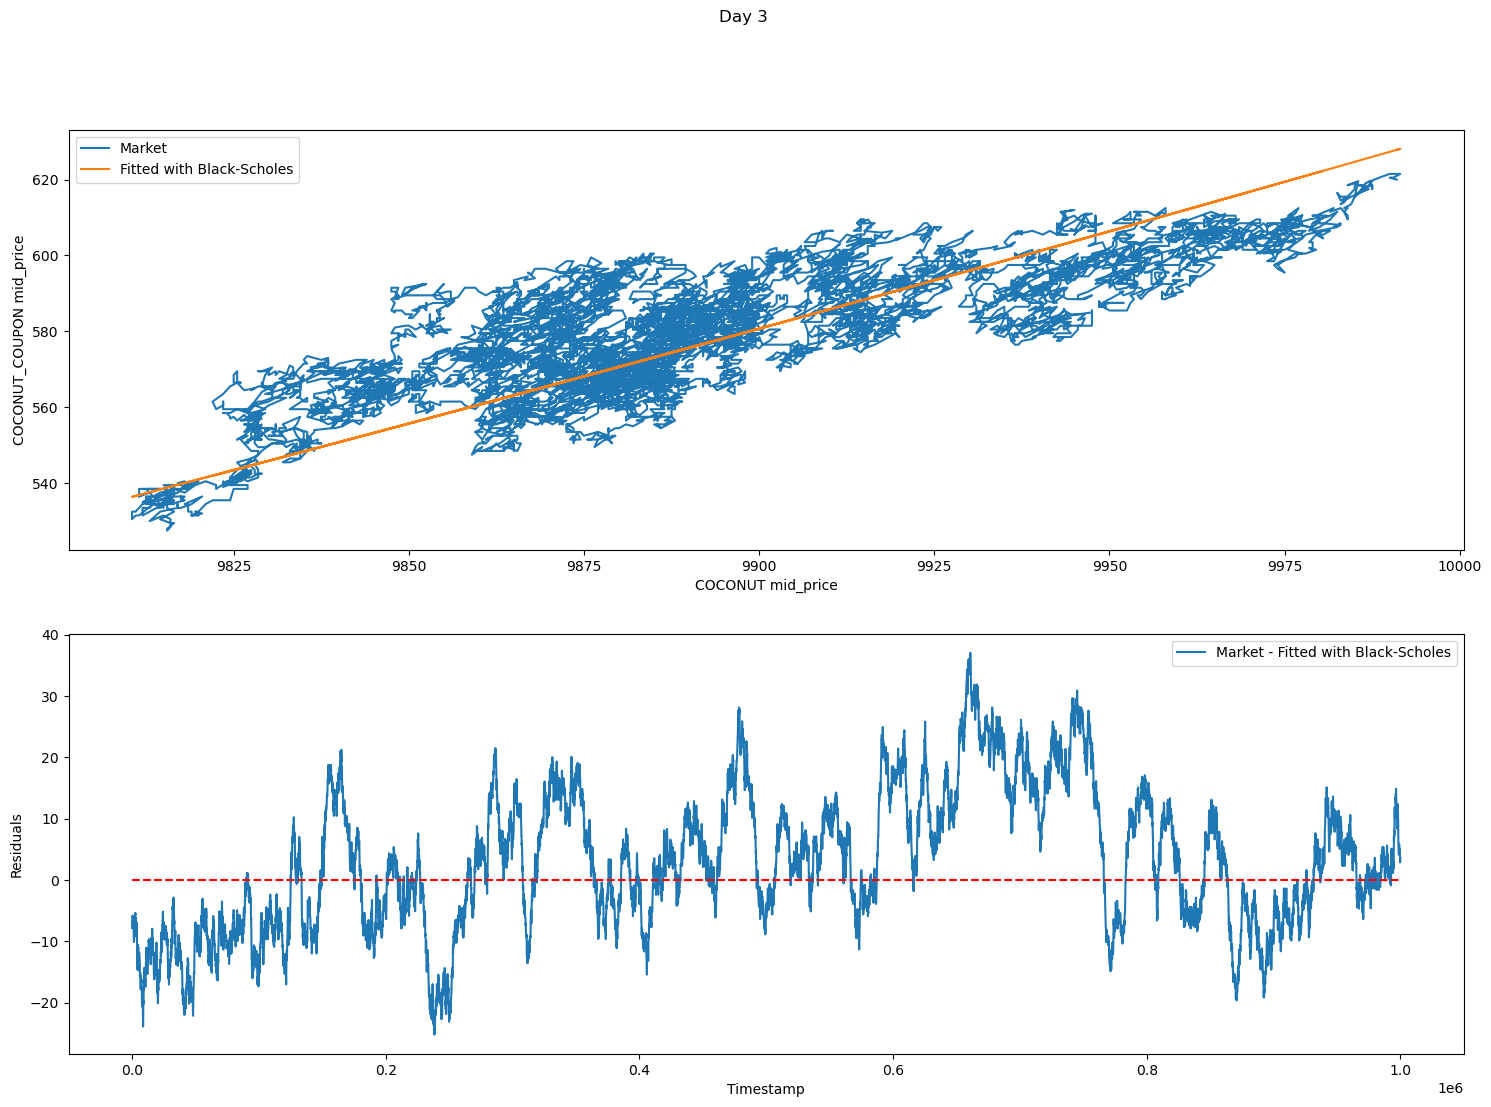

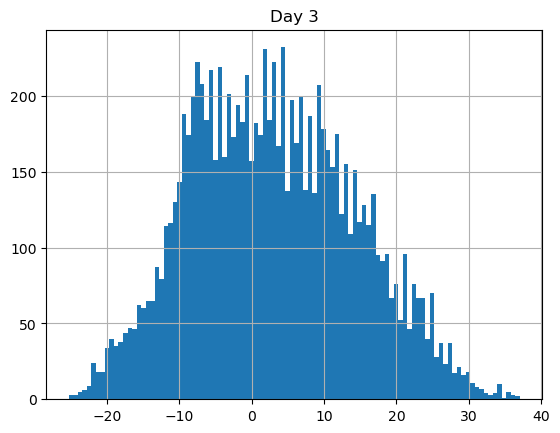

count    10000.000000
mean         2.976995
std         11.340343
min        -25.221841
25%         -5.884196
50%          2.433126
75%         11.104048
max         37.023702
Name: mid_price, dtype: float64
(-4.405202705063119, 0.00029060232528485455, 3, 9996, {'1%': -3.4310043597505673, '5%': -2.8618291880722437, '10%': -2.5669239296731097}, 29311.805452926685)


In [17]:
def func(x, a=0.01008, b=251-d):
    d1 = 1/(a * np.sqrt(b)) * (np.log(x/10_000) + (0.5 * a**2) * b)
    d2 = d1 - a * np.sqrt(b)
    return x * norm.cdf(d1) - 10_000 * norm.cdf(d2)

for d in days:
    coconut = activity.loc['COCONUT']['mid_price'][d]
    coconut_coupon = activity.loc['COCONUT_COUPON']['mid_price'][d]
    coconut_fitted = func(coconut)
    diff = coconut_coupon - coconut_fitted

    fig, axs = plt.subplots(2, 1, figsize=(18, 12))
    fig.suptitle(f'Day {d}')
    ax = axs[0]
    ax.plot(coconut, coconut_coupon, label='Market')
    ax.plot(coconut, coconut_fitted, label='Fitted with Black-Scholes')
    ax.set_xlabel('COCONUT mid_price')
    ax.set_ylabel('COCONUT_COUPON mid_price')
    ax.legend()

    ax = axs[1]
    ax.plot(diff, label='Market - Fitted with Black-Scholes')
    ax.hlines(0, 0, diff.index[-1], color='red', linestyle='--')
    plt.xlabel('Timestamp')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

    plt.figure()
    diff.hist(bins=100)
    plt.title(f'Day {d}')
    plt.show()

    print(diff.describe())
    print(adfuller(diff))

In [18]:
coconut = activity.loc['COCONUT']['mid_price']
coconut_coupon = activity.loc['COCONUT_COUPON']['mid_price']

time_to_maturity = (251 - (coconut.index.get_level_values(0) + coconut.index.get_level_values(1)/1_000_000)).values
time_to_maturity

array([250.    , 249.9999, 249.9998, ..., 247.0003, 247.0002, 247.0001])

In [19]:
def func(X, a):
    x, y = X
    d1 = 1/(a * np.sqrt(y)) * (np.log(x/10_000) + (0.5 * a**2) * y)
    d2 = d1 - a * np.sqrt(y)
    return x * norm.cdf(d1) - 10_000 * norm.cdf(d2)

popt, pcov = curve_fit(func, [coconut.values, time_to_maturity], coconut_coupon, p0=[0.01])
print(f'popt = {popt}, pcov = {pcov}')

popt = [0.01009339], pcov = [[1.55119984e-12]]


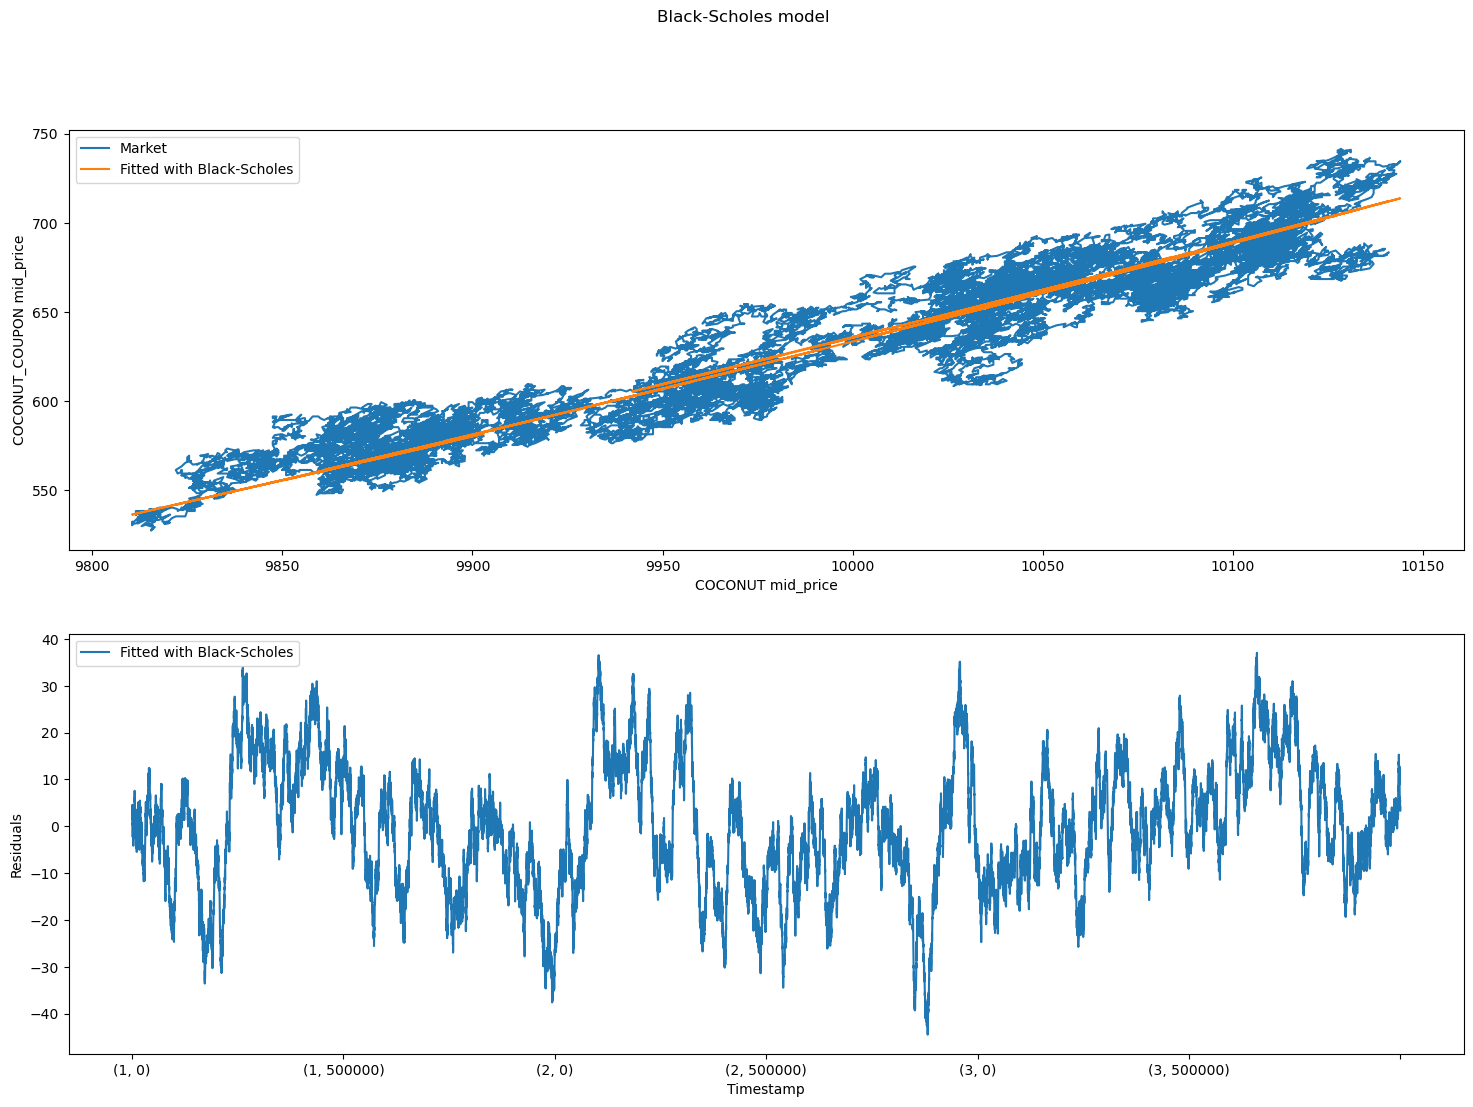

In [20]:
fitted = pd.Series(func([coconut.values, time_to_maturity], *popt), index=coconut.index)
res = coconut_coupon - fitted

fig, ax = plt.subplots(2, 1, figsize=(18, 12))
fig.suptitle('Black-Scholes model')
ax[0].plot(coconut, coconut_coupon, label='Market')
ax[0].plot(coconut, func([coconut.values, time_to_maturity], *popt), label='Fitted with Black-Scholes')
ax[0].set_xlabel('COCONUT mid_price')
ax[0].set_ylabel('COCONUT_COUPON mid_price')
ax[0].legend()

res.plot(ax=ax[1], label='Fitted with Black-Scholes')
plt.xlabel('Timestamp')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [21]:
res.groupby(res.index.get_level_values(0)).describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
1,10000.0,-0.546848,13.726303,-37.611466,-10.329121,-0.014620,9.189017,33.888281
2,10000.0,-2.174599,14.637617,-44.489524,-11.968477,-3.643476,7.804672,36.528770
3,10000.0,2.777018,11.471430,-25.754436,-6.103669,2.275687,11.009180,37.028124


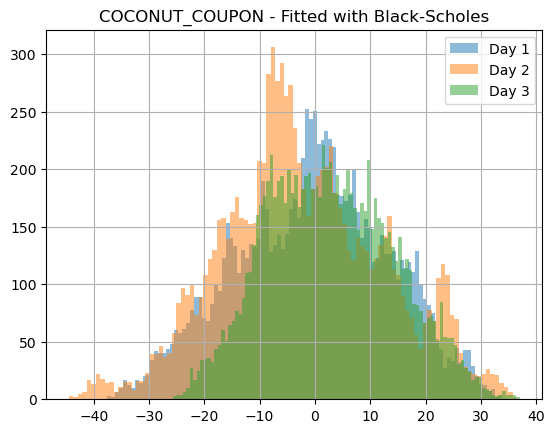

In [22]:
res.groupby(res.index.get_level_values(0)).hist(bins=100, alpha=0.5)
plt.legend([f'Day {d}' for d in days])
plt.title('COCONUT_COUPON - Fitted with Black-Scholes')
plt.show()

## Compared to linear regression

MSE = 132.04657640253947


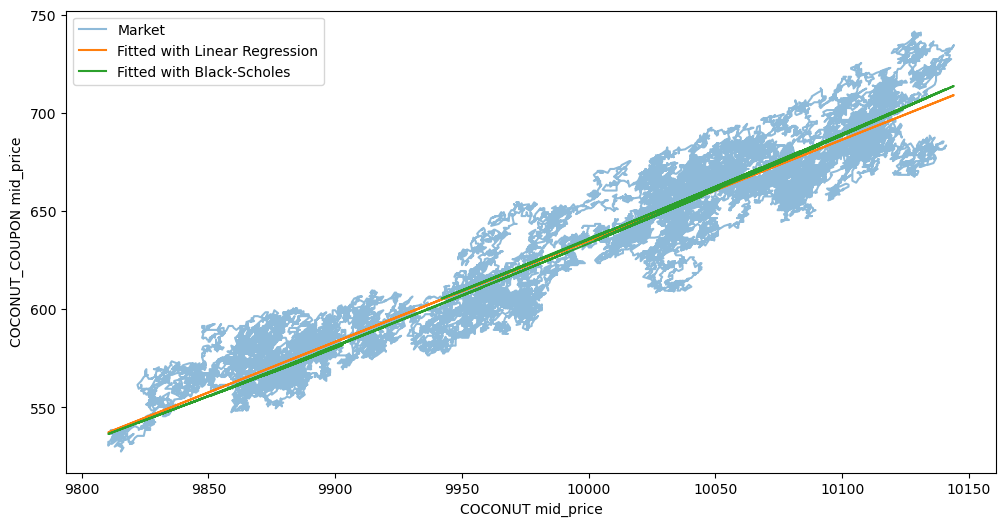

In [23]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = coconut.values.reshape(-1, 1)
y = coconut_coupon.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.334, shuffle=False)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'MSE = {mean_squared_error(y_test, y_pred)}')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(coconut, coconut_coupon, label='Market', alpha=0.5)
ax.plot(coconut, model.predict(x), label='Fitted with Linear Regression')
ax.plot(coconut, func([coconut.values, time_to_maturity], *popt), label='Fitted with Black-Scholes')
plt.xlabel('COCONUT mid_price')
plt.ylabel('COCONUT_COUPON mid_price')
plt.legend()
plt.show()

In [24]:
res_linear = coconut_coupon - pd.Series(model.predict(x), index=coconut.index)
res_linear.groupby(res_linear.index.get_level_values(0)).describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
1,10000.0,1.121478,13.452687,-33.628634,-8.541444,1.706337,10.574527,34.261847
2,10000.0,-1.137383,15.008443,-45.000682,-10.832581,-3.060357,8.497287,40.371366
3,10000.0,0.541971,11.484820,-28.054212,-8.459783,-0.068209,8.804401,35.149871


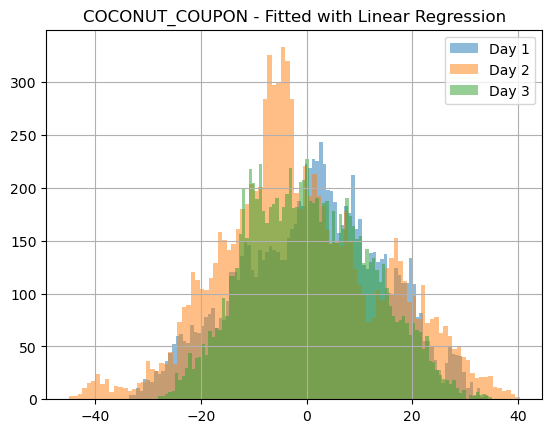

[0.515226] -4517.337886874526


In [25]:
res_linear.groupby(res_linear.index.get_level_values(0)).hist(bins=100, alpha=0.5)
plt.legend([f'Day {d}' for d in days])
plt.title('COCONUT_COUPON - Fitted with Linear Regression')
plt.show()

print(model.coef_, model.intercept_)

In [26]:
length = len(x_train)

popt, pcov = curve_fit(func, [coconut[:length], time_to_maturity[:length]], coconut_coupon[:length], p0=[0.01])
print(f'popt = {popt}, pcov = {pcov}')

y_pred = pd.Series(func([coconut.values[length:], time_to_maturity[length:]], *popt), index=coconut.index[length:])
print(f'MSE = {mean_squared_error(y_test, y_pred.values)}')

popt = [0.01007183], pcov = [[2.5609405e-12]]
MSE = 148.20450156505163


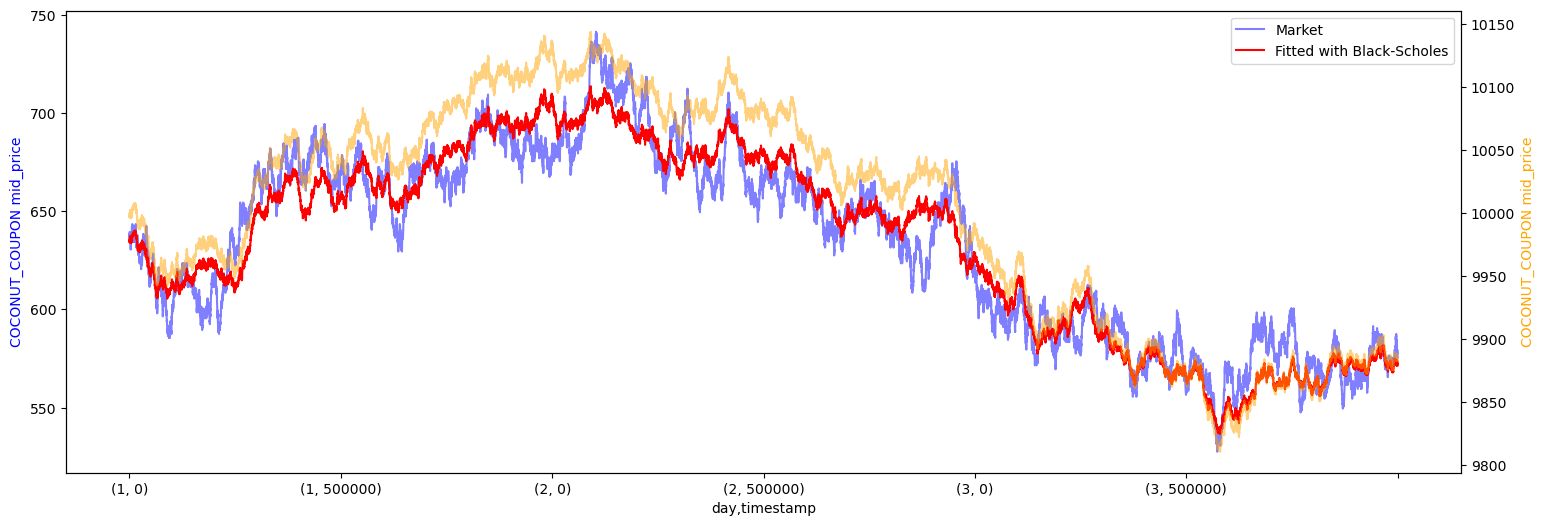

In [27]:
fig, ax = plt.subplots(figsize=(18, 6))
ax2 = ax.twinx()
coconut_coupon.plot(ax=ax, label='Market', color='blue', alpha=0.5)
fitted.plot(ax=ax, color='red',label='Fitted with Black-Scholes')
ax.set_ylabel('COCONUT_COUPON mid_price', color='blue')
ax.legend()
coconut.plot(ax=ax2, color='orange', alpha=0.5)
ax2.set_ylabel('COCONUT mid_price', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('COCONUT_COUPON mid_price')
plt.show()

## Fitted with 3 days of data

In [28]:
popt, pcov = curve_fit(func, [coconut, time_to_maturity], coconut_coupon, p0=[0.01])
print(f'popt = {popt}, pcov = {pcov}')

fitted = pd.Series(func([coconut.values, time_to_maturity], *popt), index=coconut.index)

popt = [0.01009339], pcov = [[1.55119984e-12]]


## Approximate normal distribution cdf with linear

In [29]:
def func_approx(x, a=0.01009, b=247):
    d1 = (np.log(x/10_000) + 0.5 * a**2 * b) / (a * np.sqrt(b))
    d2 = d1 - a * np.sqrt(b)
    norm_cdf_d1 = 1/2 + d1/(np.sqrt(2 * np.pi))
    norm_cdf_d2 = 1/2 + d2/(np.sqrt(2 * np.pi))
    return x * norm_cdf_d1 - 10_000 * norm_cdf_d2, norm_cdf_d1, 10_000 * norm_cdf_d2

fitted_approx, k, b = func_approx(coconut)
(fitted - fitted_approx).groupby(fitted.index.get_level_values(0)).describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
1,10000.0,2.173831,0.895498,-0.366096,1.566469,2.421155,2.904557,3.368901
2,10000.0,0.699865,0.365819,-0.613870,0.513899,0.798829,0.978833,1.279128
3,10000.0,-1.475831,1.217886,-4.501193,-2.263051,-1.797550,-0.408182,0.815295


In [30]:
k.describe()

count    30000.000000
mean         0.531507
std          0.022363
min          0.483500
25%          0.509775
50%          0.538164
75%          0.551054
max          0.567600
Name: mid_price, dtype: float64

In [31]:
b.describe()

count    30000.000000
mean      4682.443088
std        223.625577
min       4202.372219
25%       4465.124562
50%       4749.010111
75%       4877.905364
max       5043.371933
Name: mid_price, dtype: float64

# Finding alphas

In [32]:
diff = coconut_coupon - fitted_approx
diff_d = diff.diff()
diff_d.groupby(diff_d.index.get_level_values(0)).describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
1,9999.0,-0.003133,1.073093,-4.424878,-0.725027,0.0,0.726717,3.823231
2,10000.0,0.001962,1.057624,-4.128356,-0.718503,0.0,0.714737,3.855042
3,10000.0,0.000868,1.057519,-3.737899,-0.751570,0.0,0.745607,4.059105


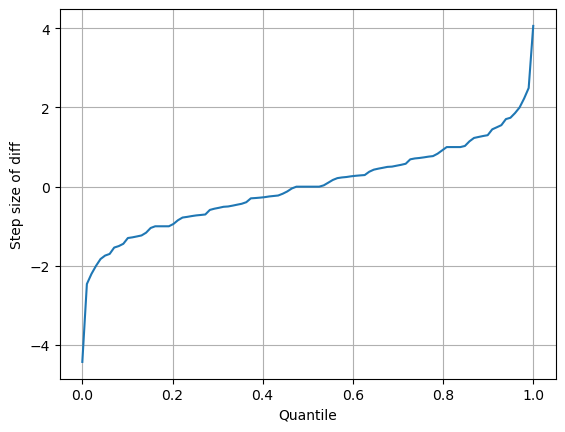

In [33]:
diff_d.quantile(np.linspace(0, 1, 100)).plot()
plt.grid()
plt.xlabel('Quantile')
plt.ylabel('Step size of diff')
plt.show()

## ACF and PACF of differential price movement

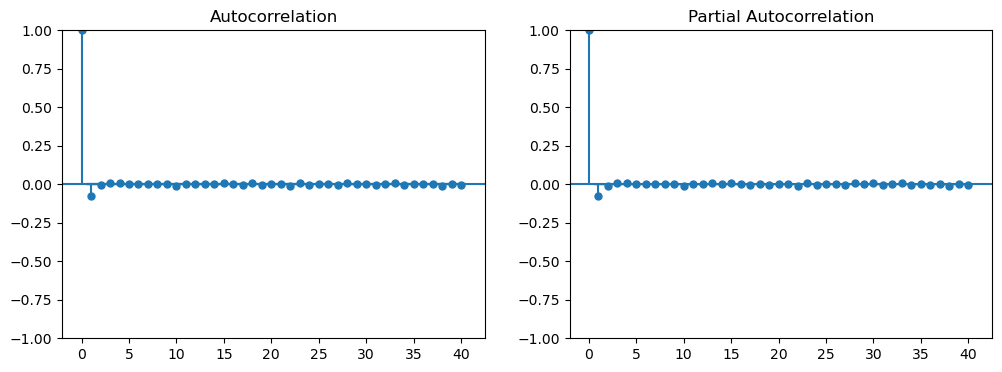

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(diff_d.dropna(), lags=40, ax=ax[0])
plot_pacf(diff_d.dropna(), lags=40, ax=ax[1])
plt.show()

In [72]:
# fit an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(diff, order=(1, 1, 0)).fit()
print(model.summary())

c:\Users\Meilism\miniconda3\envs\prosperity\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Meilism\miniconda3\envs\prosperity\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Meilism\miniconda3\envs\prosperity\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              mid_price   No. Observations:                30000
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -44309.513
Date:                Sun, 21 Apr 2024   AIC                          88623.026
Time:                        19:55:07   BIC                          88639.643
Sample:                             0   HQIC                         88628.358
                              - 30000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0739      0.006    -12.841      0.000      -0.085      -0.063
sigma2         1.1232      0.009    120.899      0.000       1.105       1.141
Ljung-Box (L1) (Q):                   0.02   Jarque-

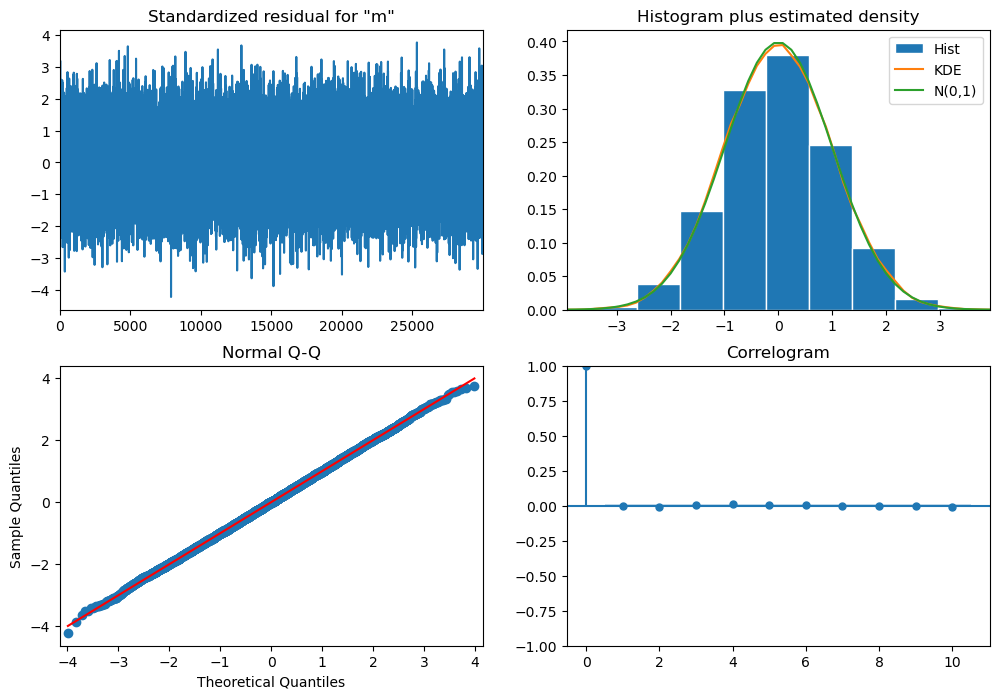

In [74]:
model.plot_diagnostics(figsize=(12, 8))
plt.show()

## ACF and PACF of price differences between two iterations

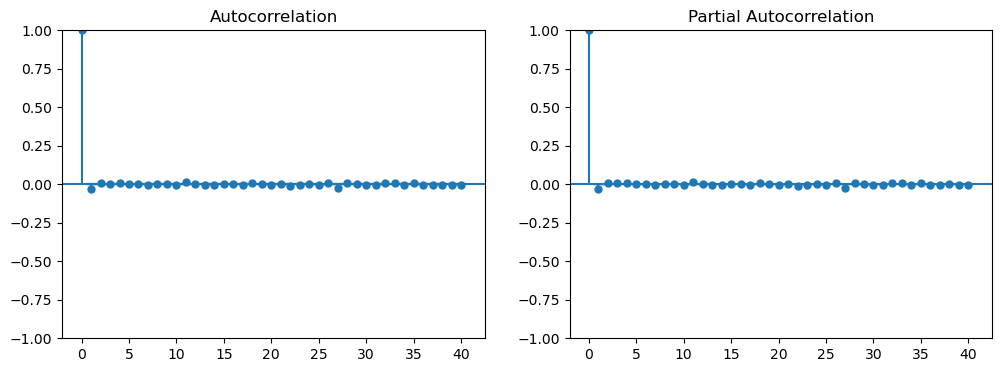

In [97]:
coconut_d = coconut.diff()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(coconut_d.dropna(), lags=40, ax=ax[0])
plot_pacf(coconut_d.dropna(), lags=40, ax=ax[1])
plt.show()

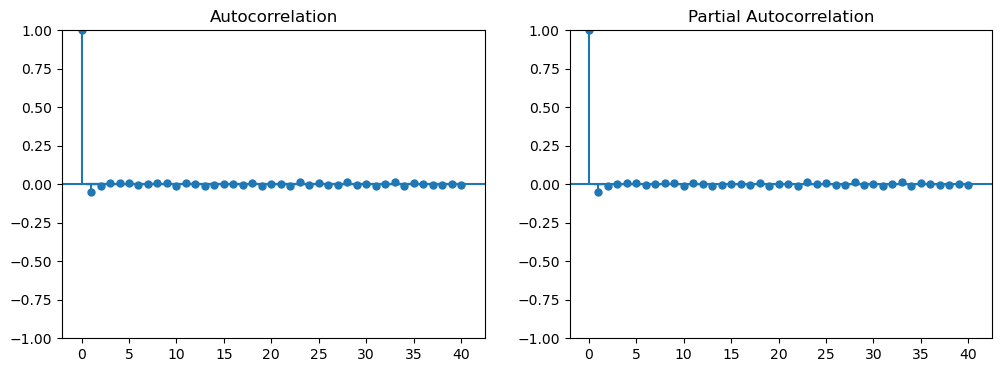

In [98]:
coconut_coupon_d = coconut_coupon.diff()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(coconut_coupon_d.dropna(), lags=40, ax=ax[0])
plot_pacf(coconut_coupon_d.dropna(), lags=40, ax=ax[1])
plt.show()

## Short term momentum and long term momentum

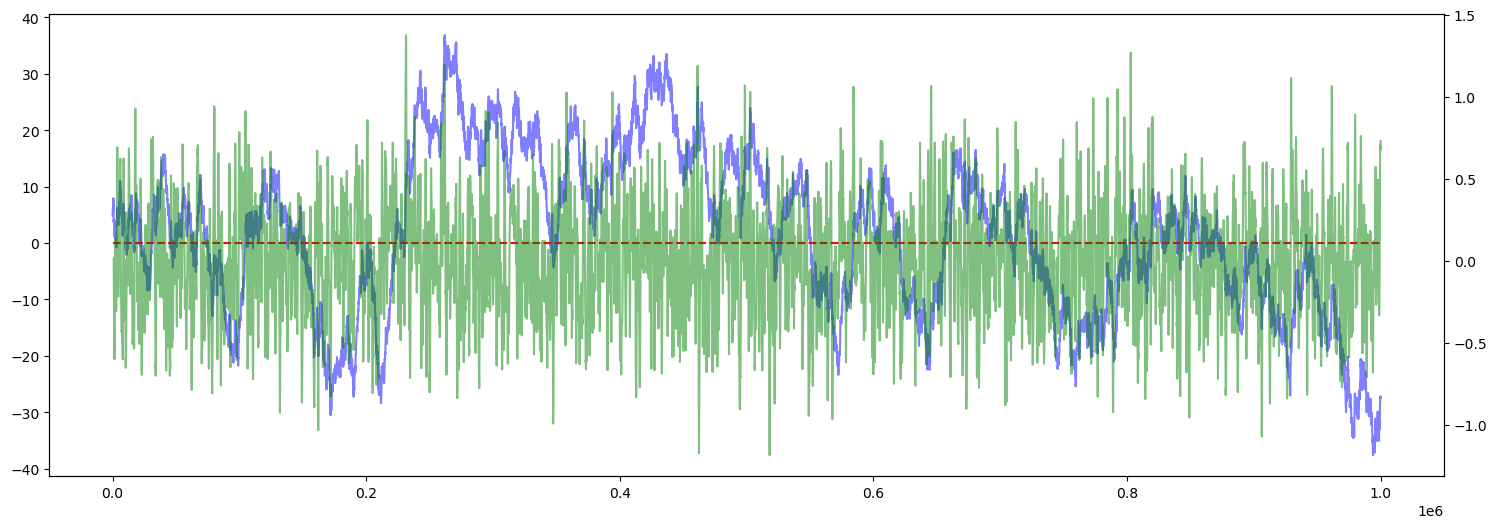

In [131]:
sample = 9999
d = 1
window1 = 10
window2 = 20

diff_day = diff.loc[d]
moving_slope = diff_day.rolling(window=window1).apply(lambda x: np.polyfit(range(window1), x, 1)[0])
# signal = diff_day[mask]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(diff_day[:sample], color='blue', alpha=0.5, label='differential price')
ax.hlines(0, 0, diff_day.index[sample], color='red', linestyle='--')
# ax.scatter(signal.index, signal, color='red', label='signal')
ax2 = ax.twinx()
ax2.plot(moving_slope[:sample], color='green', alpha=0.5, label='moving variance')
# ax2.plot(m_long - m_short, color='red', alpha=0.5)

plt.show()

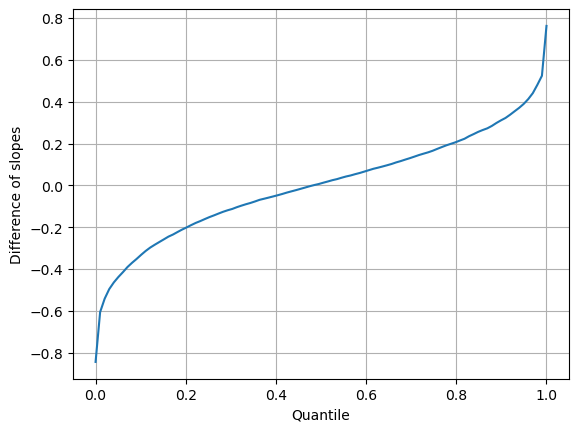

In [119]:
(m_long - m_short).quantile(np.linspace(0, 1, 100)).plot()
plt.grid()
plt.xlabel('Quantile')
plt.ylabel('Difference of slopes')
plt.show()

# Analyzing log file

In [34]:
_, trade_history, _ = load_log('log/round4_threshold_backtest.log', day=1)
trade_history

d:\Projects\Prosperity-Trader\JM\analysis\utils.py:44: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  trade_history = pd.read_json(trade_history)


buyer      seller   currency  price  \
symbol         day timestamp                                             
COCONUT_COUPON 1   500                    SUBMISSION  SEASHELLS    637   
COCONUT        1   600        SUBMISSION              SEASHELLS   9998   
COCONUT_COUPON 1   700                    SUBMISSION  SEASHELLS    639   
COCONUT        1   800        SUBMISSION              SEASHELLS   9998   
COCONUT_COUPON 1   800                                SEASHELLS    636   
...                                  ...         ...        ...    ...   
               3   996200                             SEASHELLS    585   
COCONUT        3   997100                             SEASHELLS   9885   
                   997200                             SEASHELLS   9883   
                   998600                             SEASHELLS   9887   
COCONUT_COUPON 3   999800                             SEASHELLS    575   

                              quantity  
symbol         day timestamp            
COCONUT_COUPON 1   500              37  
COCONUT        1   600              20  
COCONUT_COUPON 1   700              42  
COCONUT        1   800              22  
COCONUT_COUPON 1   800               5  
...                                ...  
               3   996200           14  
COCONUT        3   997100            9  
                   997200            8  
                   998600            5  
COCONUT_COUPON 3   999800           14  

[8188 rows x 5 columns]

C:\Users\Meilism\AppData\Local\Temp\ipykernel_38368\658224641.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  trade = trade_history.loc['COCONUT_COUPON', d]


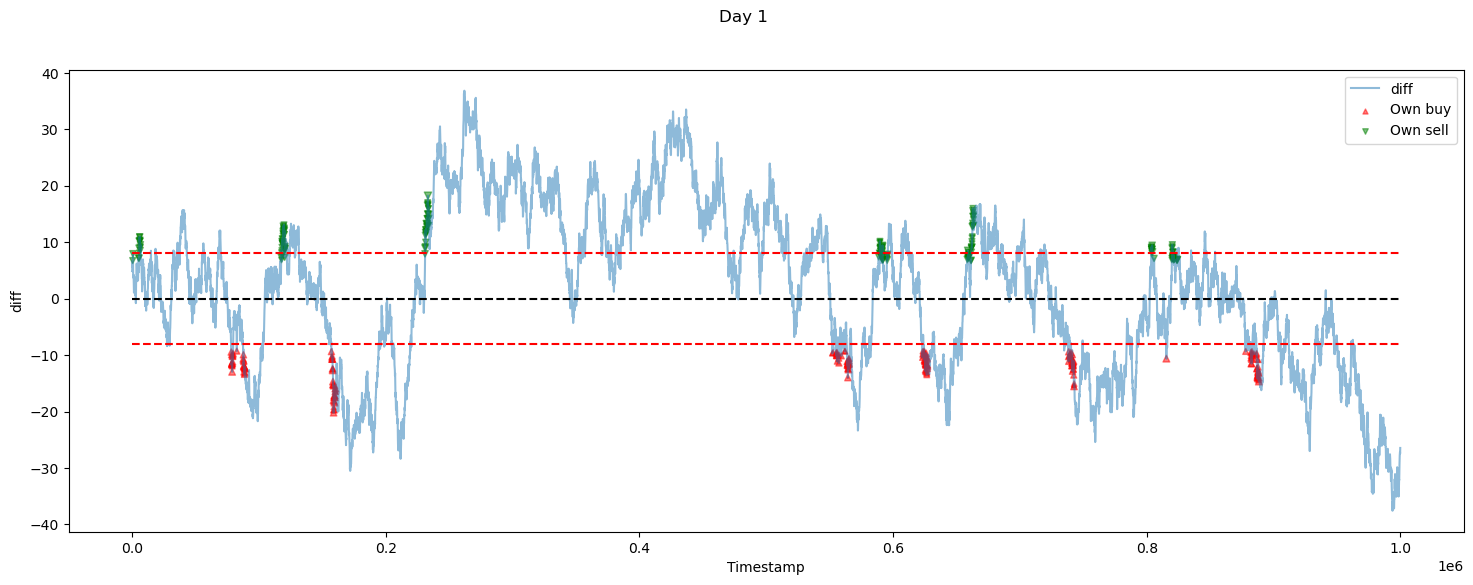

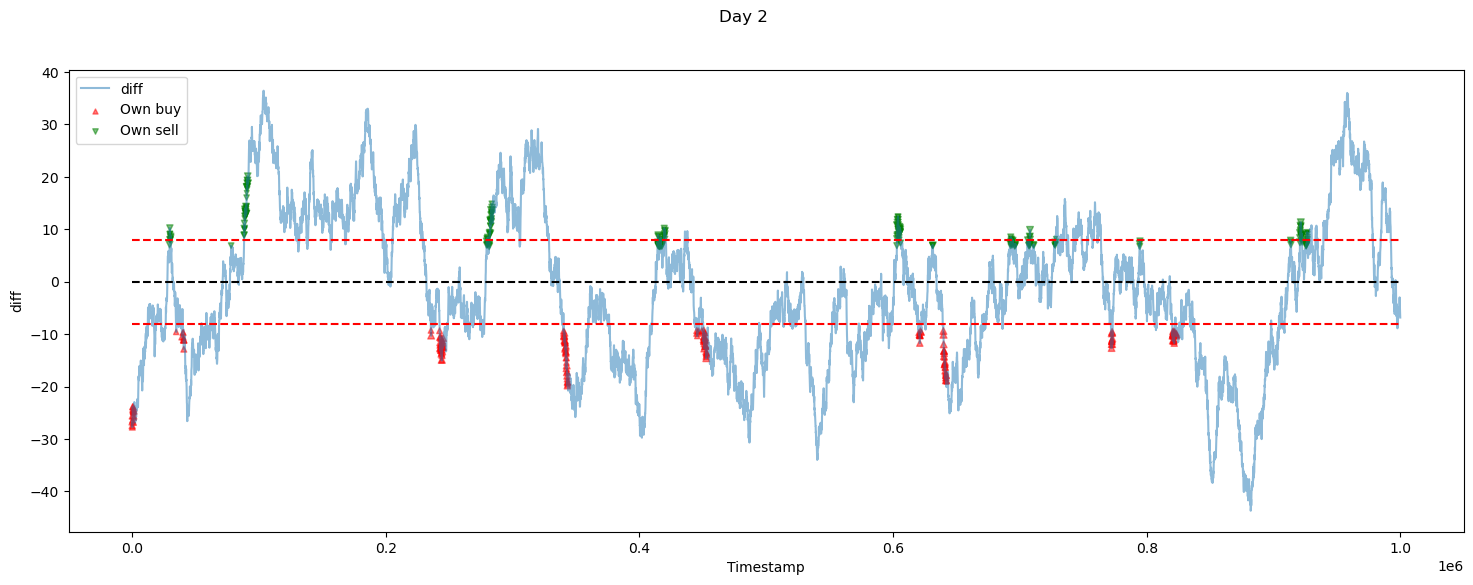

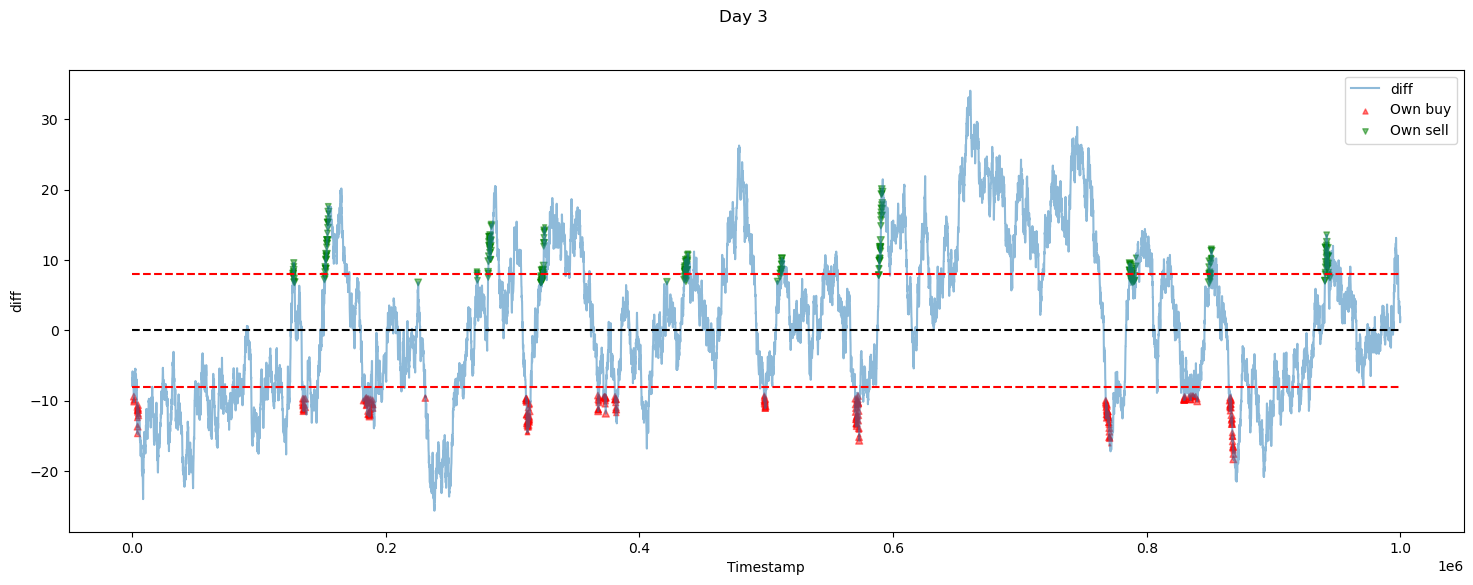

In [88]:
for d in days:
    diff_day = diff[d]
    trade = trade_history.loc['COCONUT_COUPON', d]
    own_buy = trade[(trade['buyer'] == 'SUBMISSION')]
    own_sell = trade[(trade['seller'] == 'SUBMISSION')]

    fig, ax = plt.subplots(figsize=(18, 6))
    fig.suptitle(f'Day {d}')
    ax.plot(diff_day, label='diff', alpha=0.5)
    ax.scatter(own_buy.index, diff_day.loc[own_buy.index], label='Own buy', color='red', s=own_buy['quantity']/2, alpha=0.5, marker='^')
    ax.scatter(own_sell.index, diff_day.loc[own_sell.index], label='Own sell', color='green', s=own_sell['quantity']/2, alpha=0.5, marker='v')
    plt.hlines(0, 0, diff_day.index[-1], color='black', linestyle='--')
    plt.hlines(8, 0, diff_day.index[-1], color='red', linestyle='--')
    plt.hlines(-8, 0, diff_day.index[-1], color='red', linestyle='--')
    plt.xlabel('Timestamp')
    plt.ylabel('diff')
    plt.legend()
    plt.show()

In [96]:
own_trade = trade_history.loc['COCONUT_COUPON'][(trade_history.loc['COCONUT_COUPON']['buyer'] == 'SUBMISSION') | (trade_history.loc['COCONUT_COUPON']['seller'] == 'SUBMISSION')]
pd.set_option('display.max_rows', 100)
own_trade.head(100)

buyer      seller   currency  price  quantity
day timestamp                                                    
1   500                    SUBMISSION  SEASHELLS    637        37
    700                    SUBMISSION  SEASHELLS    639        42
    5200                   SUBMISSION  SEASHELLS    638        43
    5500                   SUBMISSION  SEASHELLS    639        40
    5600                   SUBMISSION  SEASHELLS    640        28
    5700                   SUBMISSION  SEASHELLS    641        49
    5800                   SUBMISSION  SEASHELLS    642        48
    5900                   SUBMISSION  SEASHELLS    642        36
    6000                   SUBMISSION  SEASHELLS    641        41
    6100                   SUBMISSION  SEASHELLS    642        39
    6200                   SUBMISSION  SEASHELLS    642        35
    6300                   SUBMISSION  SEASHELLS    642        37
    6400                   SUBMISSION  SEASHELLS    642        42
    6500                   SUBMISSION  SEASHELLS    642        38
    6600                   SUBMISSION  SEASHELLS    643        40
    6700                   SUBMISSION  SEASHELLS    643         5
    78200      SUBMISSION              SEASHELLS    600        41
    78300      SUBMISSION              SEASHELLS    601        33
    78400      SUBMISSION              SEASHELLS    599        32
    78500      SUBMISSION              SEASHELLS    599        37
    78600      SUBMISSION              SEASHELLS    598        37
    78700      SUBMISSION              SEASHELLS    598        37
    78800      SUBMISSION              SEASHELLS    598        35
    78900      SUBMISSION              SEASHELLS    597        46
    79000      SUBMISSION              SEASHELLS    598        32
    79100      SUBMISSION              SEASHELLS    598        41
    79200      SUBMISSION              SEASHELLS    599        43
    79300      SUBMISSION              SEASHELLS    598        39
    79400      SUBMISSION              SEASHELLS    599        32
    79500      SUBMISSION              SEASHELLS    599        41
    79600      SUBMISSION              SEASHELLS    599        41
    82600      SUBMISSION              SEASHELLS    604        38
    87600      SUBMISSION              SEASHELLS    598        41
    87800      SUBMISSION              SEASHELLS    598        42
    87900      SUBMISSION              SEASHELLS    597        44
    88000      SUBMISSION              SEASHELLS    596        43
    88100      SUBMISSION              SEASHELLS    596        36
    88200      SUBMISSION              SEASHELLS    595        45
    88300      SUBMISSION              SEASHELLS    595        29
    88400      SUBMISSION              SEASHELLS    595        44
    88500      SUBMISSION              SEASHELLS    594        48
    88600      SUBMISSION              SEASHELLS    594        36
    88700      SUBMISSION              SEASHELLS    595        41
    88800      SUBMISSION              SEASHELLS    594         2
    88800      SUBMISSION              SEASHELLS    595        41
    88900      SUBMISSION              SEASHELLS    594        43
    89000      SUBMISSION              SEASHELLS    593        40
    89100      SUBMISSION              SEASHELLS    592        20
    117600                 SUBMISSION  SEASHELLS    612        44
    117700                 SUBMISSION  SEASHELLS    613        23
    117800                 SUBMISSION  SEASHELLS    612        31
    118000                 SUBMISSION  SEASHELLS    613        40
    118100                 SUBMISSION  SEASHELLS    613        34
    118200                 SUBMISSION  SEASHELLS    614        35
    118300                 SUBMISSION  SEASHELLS    615        33
    118400                 SUBMISSION  SEASHELLS    615        45
    118500                 SUBMISSION  SEASHELLS    616        38
    118600                 SUBMISSION  SEASHELLS    616        36
    118700                 SUBMISSION  SEASHELLS    616     